# Precipitation monthly and daily gridded data from 1979 to present derived from satellite measurements
The analysis of the Global Precipitation Climatology Project (GPCP) provides global estimates of precipitation as monthly means since 1979 (GPCP monthly v2.3) and as daily means since 1996 (GPCP daily v1.3), based on estimates using microwave imagers on polar-orbiting satellites and infrared imagers on geostationary satellites. The monthly product also includes information from rain-gauge observations analyzed by the Global Precipitation Climatology Centre (GPCC). The GPCP daily product is tied to GPCC indirectly via its calibration with the GPCP monthly product.

In [1]:
import os
import netCDF4
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [2]:
from platform import python_version
import sys
print('Python: ' + python_version()) # Python: 3.10.9
print('netCDF4: ' + netCDF4.__version__) # netCDF4: 1.6.2
print('numpy: ' + np.__version__) # numpy: 1.26.4
print('pandas: ' + pd.__version__) # pandas: 2.2.1
print ('matplotlib: ' + sys.modules["matplotlib"].__version__) # matplotlib: 3.8.3
print('seaborn: ' + sns.__version__) # seaborn: 0.13.2
print('tensorflow: ' + tf.__version__) # tensorflow: 2.10.0

Python: 3.10.9
netCDF4: 1.6.2
numpy: 1.23.5
pandas: 1.5.3
matplotlib: 3.7.0
seaborn: 0.12.2
tensorflow: 2.10.0


set Dataset path

In [3]:
Datasetpath = "datasets_daily/dataset-satellite-precipitation/"

# Look into the data structure of a single file

In [4]:
file2read = netCDF4.Dataset(Datasetpath+'gpcp_v01r03_daily_d20200101_c20200408.nc','r')

In [5]:
print(file2read)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD 1.3
    title: Global Precipitation Climatatology Project (GPCP) Climate Data Record (CDR), Daily V1.3
    source: /data1/GPCP_CDR/GPCP_Output/1DD//bin/202001/stfsg3.20200101.s
    references: Huffman et al. 1997, http://dx.doi.org/10.1175/1520-0477(1997)078<0005:TGPCPG>2.0.CO;2; Adler et al. 2003, http://dx.doi.org/10.1175/1525-7541(2003)004<1147:TVGPCP>2.0.CO;2; Huffman et al. 2009, http://dx.doi.org/10.1029/2009GL040000; Adler et al. 2017, Global Precipitation Climatology Project (GPCP) Daily Analysis: Climate Algorithm Theoretical Basis Document (C-ATBD)
    history: 1) 2020-04-08T15:19:44Z, Dr. Jian-Jian Wang, U of Maryland, Created beta (B1) file
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0, NOAA CDR v1.0, GDS v2.0
    standard_name_vocabulary: CF Standard Name Table (v41, 22 February 2017)
    id: 202001/gpcp_v01r03_daily_d20200101_c20200408.nc


In [6]:
file2read.dimensions

{'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 180,
 'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 360,
 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1,
 'nv': <class 'netCDF4._netCDF4.Dimension'>: name = 'nv', size = 2}

In [7]:
file2read.ncattrs()

['Conventions',
 'title',
 'source',
 'references',
 'history',
 'Metadata_Conventions',
 'standard_name_vocabulary',
 'id',
 'naming_authority',
 'date_created',
 'license',
 'summary',
 'keywords',
 'keywords_vocabulary',
 'cdm_data_type',
 'project',
 'processing_level',
 'creator_name',
 'creator_email',
 'institution',
 'publisher_name',
 'publisher_email',
 'publisher_url',
 'geospatial_lat_min',
 'geospatial_lat_max',
 'geospatial_lat_units',
 'geospatial_lat_resolution',
 'geospatial_lon_min',
 'geospatial_lon_max',
 'geospatial_lon_units',
 'geospatial_lon_resolution',
 'time_coverage_start',
 'time_coverage_end',
 'time_coverage_duration',
 'contributor_name',
 'contributor_role',
 'acknowledgment',
 'cdr_program',
 'cdr_variable',
 'metadata_link',
 'product_version',
 'platform',
 'sensor',
 'spatial_resolution',
 'comment']

In [8]:
print(file2read.__dict__)

{'Conventions': 'CF-1.6, ACDD 1.3', 'title': 'Global Precipitation Climatatology Project (GPCP) Climate Data Record (CDR), Daily V1.3', 'source': '/data1/GPCP_CDR/GPCP_Output/1DD//bin/202001/stfsg3.20200101.s', 'references': 'Huffman et al. 1997, http://dx.doi.org/10.1175/1520-0477(1997)078<0005:TGPCPG>2.0.CO;2; Adler et al. 2003, http://dx.doi.org/10.1175/1525-7541(2003)004<1147:TVGPCP>2.0.CO;2; Huffman et al. 2009, http://dx.doi.org/10.1029/2009GL040000; Adler et al. 2017, Global Precipitation Climatology Project (GPCP) Daily Analysis: Climate Algorithm Theoretical Basis Document (C-ATBD)', 'history': '1) 2020-04-08T15:19:44Z, Dr. Jian-Jian Wang, U of Maryland, Created beta (B1) file', 'Metadata_Conventions': 'CF-1.6, Unidata Dataset Discovery v1.0, NOAA CDR v1.0, GDS v2.0', 'standard_name_vocabulary': 'CF Standard Name Table (v41, 22 February 2017)', 'id': '202001/gpcp_v01r03_daily_d20200101_c20200408.nc', 'naming_authority': 'gov.noaa.ncdc', 'date_created': '2020-04-08T15:19:44Z', 

## Time

In [9]:
file2read.variables["time"]

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: time
    standard_name: time
    units: days since 1970-01-01 00:00:00 0:00
    calendar: Gregorian
    axis: T
    bounds: time_bounds
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [10]:
print(file2read.variables["time"][:])

[18262.]


In [11]:
datetime.date.fromtimestamp(int(file2read.variables["time"][0]*24*60*60)).strftime('%Y-%m-%d')

'2020-01-01'

## Latitude

In [12]:
latitude = np.array(file2read.variables["latitude"][:])
latitude[::10]

array([-90., -80., -70., -60., -50., -40., -30., -20., -10.,   0.,  10.,
        20.,  30.,  40.,  50.,  60.,  70.,  80.], dtype=float32)

In [13]:
print(file2read.variables["lat_bounds"][:5])

[[-90. -89.]
 [-89. -88.]
 [-88. -87.]
 [-87. -86.]
 [-86. -85.]]


## Longitude

In [14]:
file2read.variables["longitude"]

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
    valid_range: [  0. 360.]
    axis: X
    bounds: lon_bounds
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [15]:
longitude = np.array(file2read.variables["longitude"][:])
longitude[::10]

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350.], dtype=float32)

In [16]:
print(file2read.variables["lon_bounds"][:5])

[[0. 1.]
 [1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]]


### convert 360E to -180W 180E format

In [17]:
longitude = (longitude + 180) % 360 - 180
longitude[::10]

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
       -180., -170., -160., -150., -140., -130., -120., -110., -100.,
        -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,  -10.],
      dtype=float32)

## Precipitation

In [18]:
file2read.variables["precip"]

<class 'netCDF4._netCDF4.Variable'>
float32 precip(time, latitude, longitude)
    long_name: NOAA Climate Data Record (CDR) of Daily GPCP Satellite-Gauge Combined Precipitation
    standard_name: lwe_precipitation_rate
    units: mm/day
    coordinates: time latitude longitude
    valid_range: [  0. 100.]
    cell_methods: area: mean time: mean
    missing_value: -9999.0
unlimited dimensions: 
current shape = (1, 180, 360)
filling on, default _FillValue of 9.969209968386869e+36 used

In [19]:
file2read.variables["precip"][:,:,:]

masked_array(
  data=[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [20]:
print(file2read.variables["precip"][0,:50,50])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.1146808  4.218963   6.2943964
 6.1552806  3.9843895  3.9008389  4.4869604  7.0709867  7.0467577
 2.7495892  1.2723275  0.         0.         0.         0.3793029
 0.7555419  2.547545   2.6060252  2.4132001  1.1823862  0.29071113
 0.         0.0906965  0.         0.         0.1729814  0.10815901
 0.         0.        ]


In [21]:
print(file2read.variables["precip"][0,50,:50])

[0.30750903 0.10143995 0.3833121  0.43898192 0.9216296  1.692756
 1.8171581  1.9639574  1.6413054  1.5013528  2.5182333  1.500843
 1.4281259  0.40514478 0.3470211  1.0870162  0.46344852 0.
 0.         0.22189777 0.2366558  0.059023   0.02651937 0.0381344
 0.02167593 0.00553462 0.         0.45308048 0.19147271 0.5212674
 1.2471769  2.0194924  2.606563   1.4420145  1.5869393  3.575311
 2.713578   0.14791845 0.01726156 0.19797707 0.04131417 0.1301258
 0.50181884 0.65868473 0.         0.04870873 0.05631706 0.12723134
 0.09757542 0.00417236]


# Import all data

In [22]:
dataset_list = os.listdir(Datasetpath)

Total number of Files

In [23]:
len(dataset_list)

731

In [24]:
List_time = []
List_data = None

The longitude is sorted to range from -180 to 180 (see conversion 360E to -180W 180E)

In [25]:
temp = np.argsort(longitude)
for dataset in dataset_list:
    file2read = netCDF4.Dataset(Datasetpath+dataset,'r')
    List_time.append(datetime.date.fromtimestamp(int(file2read.variables["time"][0]*24*60*60)).strftime('%Y%m%d'))
    if List_data is not None:
        List_data = np.concatenate((List_data, file2read.variables["precip"][:,:,temp]), axis=0)
    else:
        List_data = file2read.variables["precip"][:,:,:]
    ## List_data.append(file2read.variables["precip"][0,:,:])
longitude.sort()

In [26]:
List_data = List_data.data

In [27]:
List_data.shape

(731, 180, 360)

In [28]:
List_time = np.array(list(map(int, List_time)))

In [29]:
List_time[:5]

array([20200101, 20200102, 20200103, 20200104, 20200105])

In [30]:
List_data[0,:50,50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.1146808 , 4.218963  , 6.2943964 , 6.1552806 ,
       3.9843895 , 3.9008389 , 4.4869604 , 7.0709867 , 7.0467577 ,
       2.7495892 , 1.2723275 , 0.        , 0.        , 0.        ,
       0.3793029 , 0.7555419 , 2.547545  , 2.6060252 , 2.4132001 ,
       1.1823862 , 0.29071113, 0.        , 0.0906965 , 0.        ,
       0.        , 0.1729814 , 0.10815901, 0.        , 0.        ],
      dtype=float32)

In [31]:
List_data[0,50,:50]

array([0.30750903, 0.10143995, 0.3833121 , 0.43898192, 0.9216296 ,
       1.692756  , 1.8171581 , 1.9639574 , 1.6413054 , 1.5013528 ,
       2.5182333 , 1.500843  , 1.4281259 , 0.40514478, 0.3470211 ,
       1.0870162 , 0.46344852, 0.        , 0.        , 0.22189777,
       0.2366558 , 0.059023  , 0.02651937, 0.0381344 , 0.02167593,
       0.00553462, 0.        , 0.45308048, 0.19147271, 0.5212674 ,
       1.2471769 , 2.0194924 , 2.606563  , 1.4420145 , 1.5869393 ,
       3.575311  , 2.713578  , 0.14791845, 0.01726156, 0.19797707,
       0.04131417, 0.1301258 , 0.50181884, 0.65868473, 0.        ,
       0.04870873, 0.05631706, 0.12723134, 0.09757542, 0.00417236],
      dtype=float32)

# Plotting

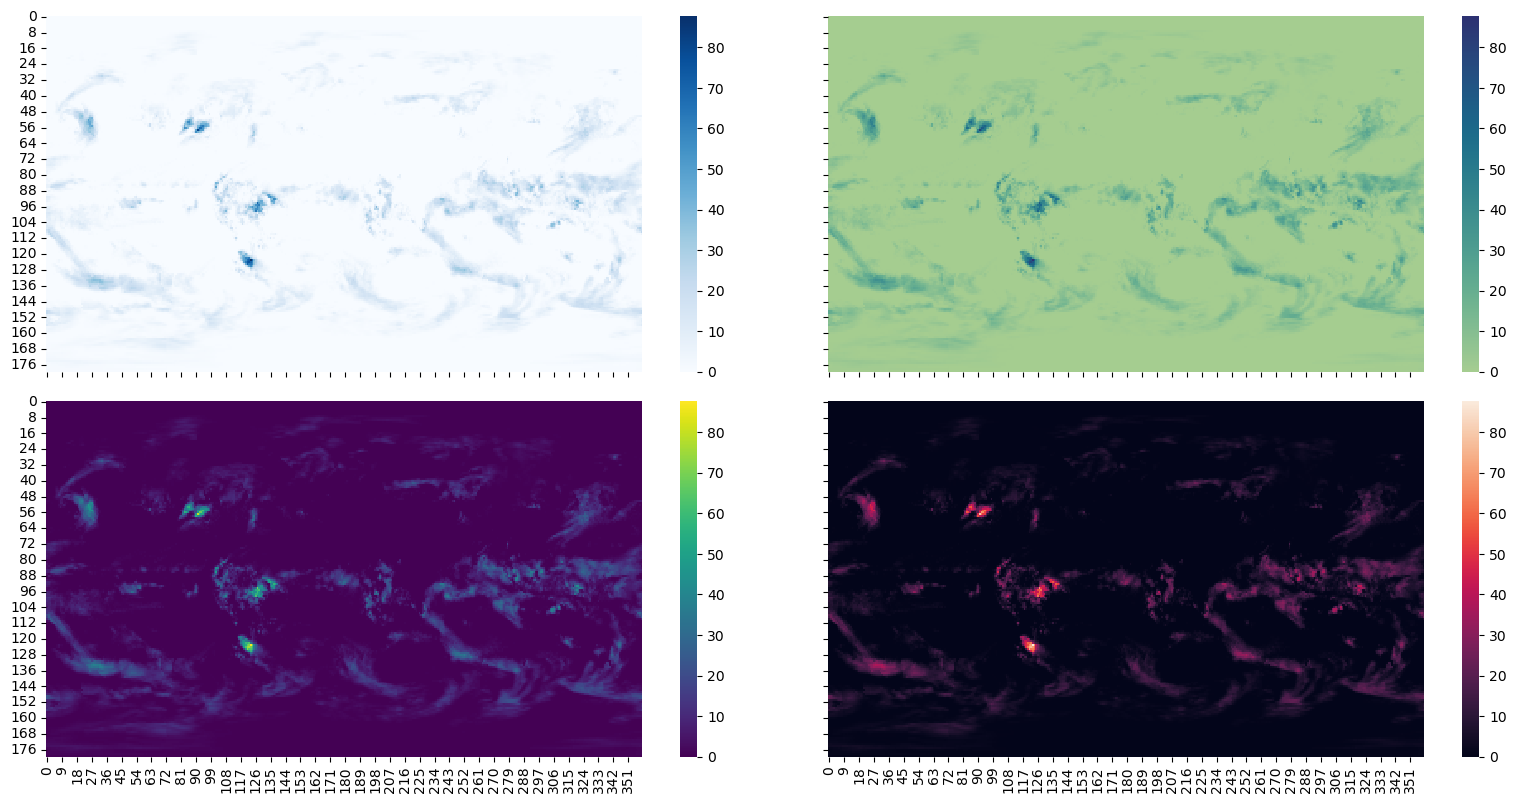

In [33]:
temp_idx = 449
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(16,8))
fig.tight_layout()
sns.heatmap(List_data[temp_idx,::-1,:], cmap="Blues", ax=axs[0,0])
sns.heatmap(List_data[temp_idx,::-1,:], cmap="crest", ax=axs[0,1])
sns.heatmap(List_data[temp_idx,::-1,:], cmap="viridis", ax=axs[1,0])
sns.heatmap(List_data[temp_idx,::-1,:], ax=axs[1,1])
plt.show()

# Missing values 

missing values are masked with -99999

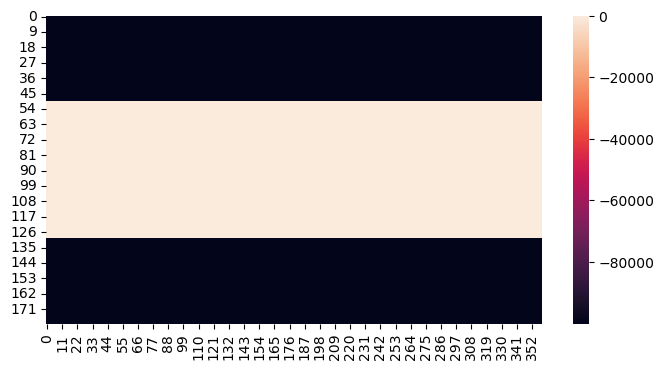

In [34]:
plt.figure(figsize=(8,4))
sns.heatmap(List_data.min(axis = 0))
plt.show()

Latitudes that have missing values

In [35]:
print([i for i,x in enumerate(List_data.min(axis = (0,2)) == -99999) if x])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]


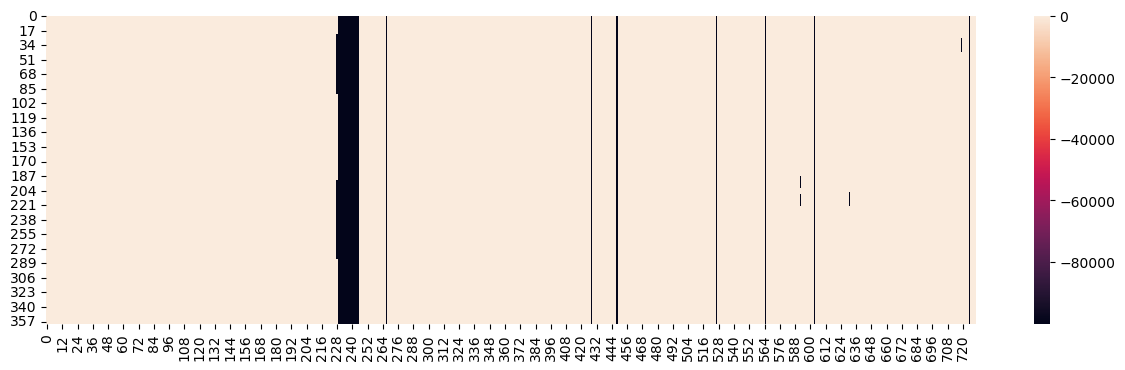

In [36]:
plt.figure(figsize=(15,4))
sns.heatmap(List_data.min(axis = 1).transpose())
plt.show()

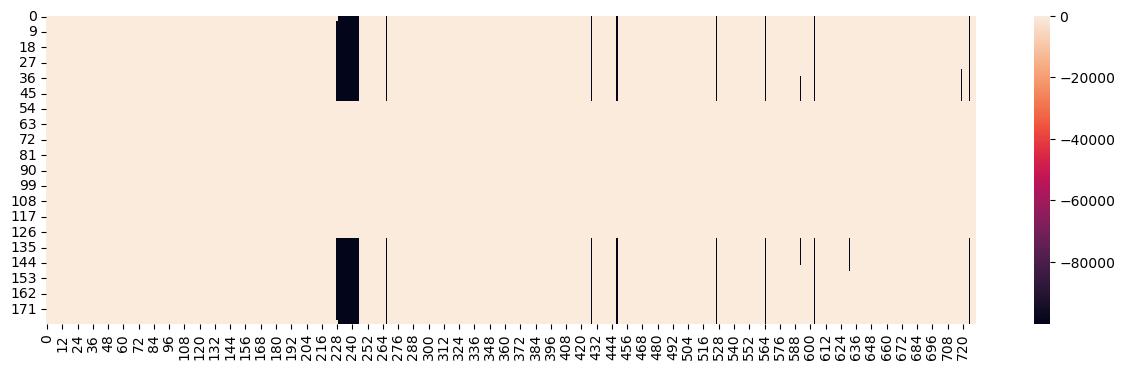

In [37]:
plt.figure(figsize=(15,4))
sns.heatmap(List_data.min(axis = 2).transpose())
plt.show()

In [34]:
temp = []
temp_1 = []
for i, x in enumerate(List_data.min(axis = (1,2)) < -1):
    if x:
        temp.append(max(List_data[i,:,:].flatten()))
        temp_1.append(sum(List_data[i,:,:].flatten() < -1))
idx_missingVal = pd.DataFrame(data= {'Date': List_time[List_data.min(axis = (1,2)) < -1], 
                                     'index': [i for i, x in enumerate(List_data.min(axis = (1,2)) < -1) if x], 
                                     'nMissing': temp_1, 'max_Val': temp})
idx_missingVal

Date  index  nMissing     max_Val
0   20200816    228      7736  107.624969
1   20200817    229     36000  130.263153
2   20200818    230     36000   82.960831
3   20200819    231     36000   81.564476
4   20200820    232     36000   82.801735
5   20200821    233     36000   65.023148
6   20200822    234     36000  135.137955
7   20200823    235     36000  103.539047
8   20200824    236     36000  164.044678
9   20200825    237     36000  121.125771
10  20200826    238     36000  102.638596
11  20200827    239     36000  109.249939
12  20200828    240     36000   75.680458
13  20200829    241     36000   87.389908
14  20200830    242     36000   76.405846
15  20200831    243     36000   84.361542
16  20200901    244     36000   79.975533
17  20200902    245     36000  100.038956
18  20200924    267     36000   87.993462
19  20210304    428     36000    0.000000
20  20210324    448     36000    0.000000
21  20210610    526     36000    0.000000
22  20210719    565     36000    0.000000
23  20210815    592       259   73.566261
24  20210826    603     36000    0.000000
25  20210923    631       145  110.907425
26  20211220    719       137   69.755447
27  20211226    725     36000    0.000000

does all cells that only contains values equal or less than zero contains missing values? Yes

In [39]:
temp = [List_data[i,:,:].min() for i in range(List_data.shape[0]) if List_data[i,:,:].max() <=0]
sum(1 for i in temp if i != -99999.)

0

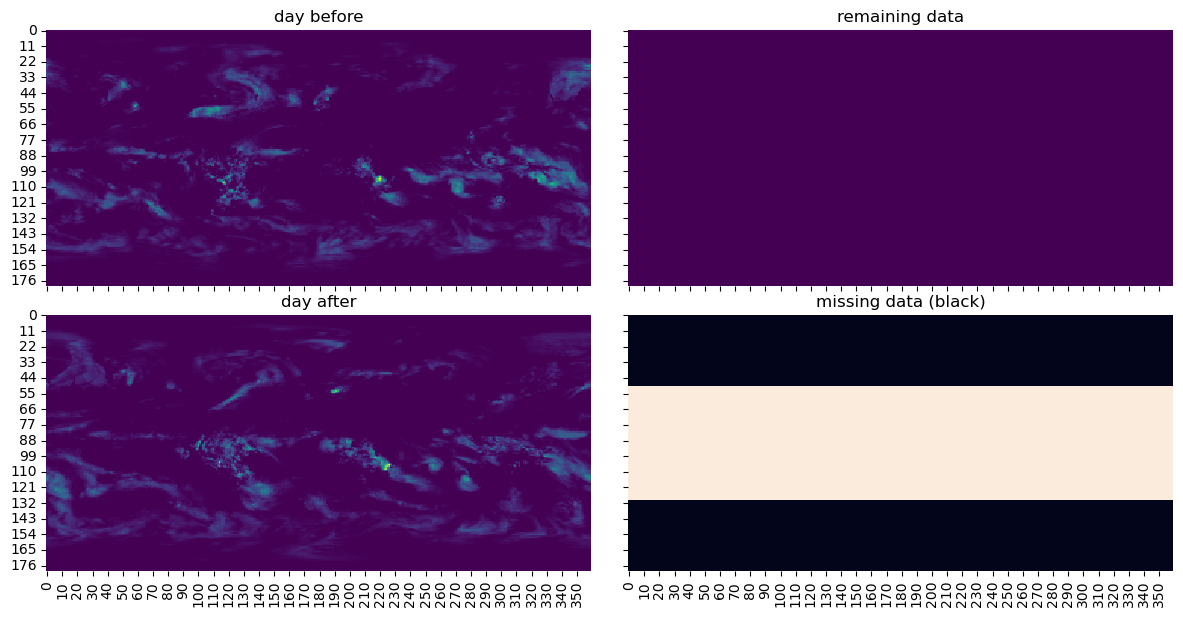

In [40]:
temp_idx = 428
fig, axs = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True, figsize=(12,6))
fig.tight_layout()
sns.heatmap(List_data[temp_idx-1,::-1,:], cbar = False, cmap="viridis", ax=axs[0, 0])
sns.heatmap(List_data[temp_idx,::-1,:], cbar = False, cmap="viridis", vmin = 0, ax=axs[0,1])
sns.heatmap(List_data[temp_idx+1,::-1,:], cbar = False, cmap="viridis", ax=axs[1,0])
sns.heatmap(List_data[temp_idx,::-1,:], cbar = False, ax=axs[1,1])
axs[0,0].set_title('day before')
axs[0,1].set_title('remaining data')
axs[1,0].set_title('day after')
axs[1,1].set_title('missing data (black)')
plt.show()

Show all slices that contains missing values

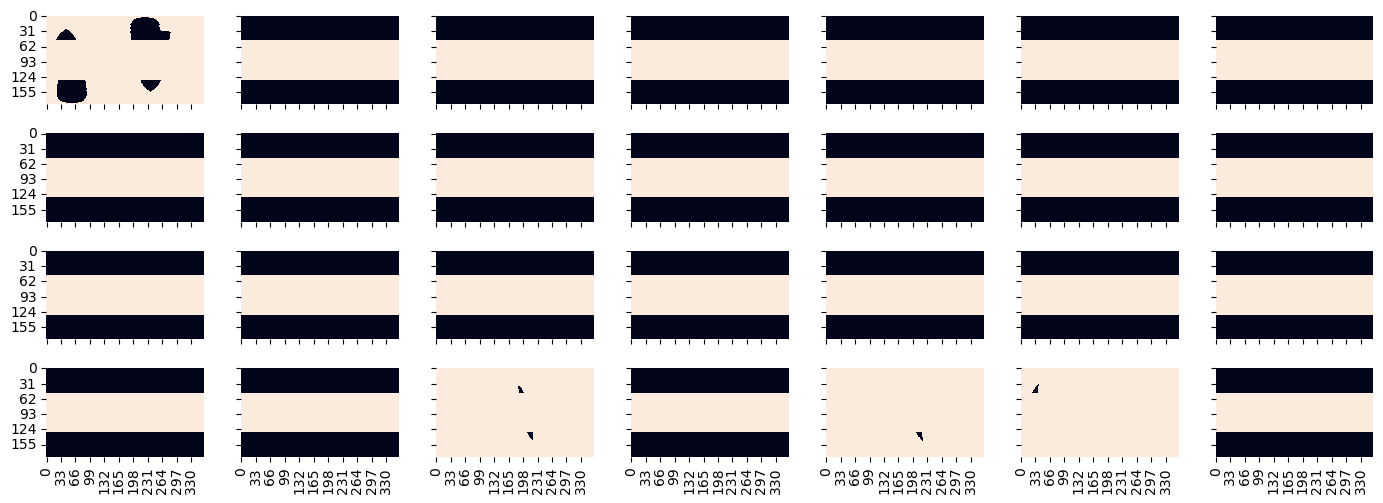

In [54]:
temp = List_data[List_data.min(axis = (1,2)) < -1,:,:]
fig, axs = plt.subplots(nrows=4, ncols=7, sharex=True, sharey=True, figsize=(14,5))
fig.tight_layout()
for i in range(temp.shape[0]):
    sns.heatmap(temp[i,:,:], cbar = False,  ax=axs[math.floor(i/7), i % 7])
plt.show()

# Use Maschine learning to infer missing data
The model creation and training are documented in the folder ML

In [35]:
# Select all time slices with missing values that have 2 complete time slices before and after 
idx_pred_IIOII = [i for i in idx_missingVal["index"] if np.isin([i-2, i-1, i+1, i+2], idx_missingVal["index"]).sum() == 0]
idx_pred_IIOII

[267, 428, 448, 526, 565, 592, 603, 631, 719, 725]

In [34]:
# create the datasets for prediction
data_pred_IIOII_x = np.array([np.transpose(List_data[[i-2, i-1, i+1, i+2],:,:], (1, 2, 0)) for i in idx_pred_IIOII])
data_pred_IIOII_x.shape

(10, 180, 360, 4)

### Load the trained complete model with encoder and predictor

In [35]:
from ML.Models import CNN_comp_IIOII as cnn_IIOII
cnn_slayers = cnn_IIOII.slayers  # layer structure I: input, O: output
cnn_elayers = cnn_IIOII.elayers  # number of encoder input layer
cnn_players = cnn_IIOII.players  # number of predictor input layer
cnn_version = cnn_IIOII.version  # version

In [36]:
cnn = cnn_IIOII.CNN_comp("./ML/")
cnn.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())
cnn.build((None,180, 360, cnn_players))

### Predict the missing time slices

In [37]:
pred_precip = cnn.predict(data_pred_IIOII_x)
pred_precip.shape

1/1 [==============================] - 1s 821ms/step


(10, 180, 360, 1)

In [38]:
## save and load the data in case of the bug where the kernel dies before plotting
# np.save("./temp.npy", pred_precip)
# pred_precip = np.load("./temp.npy")

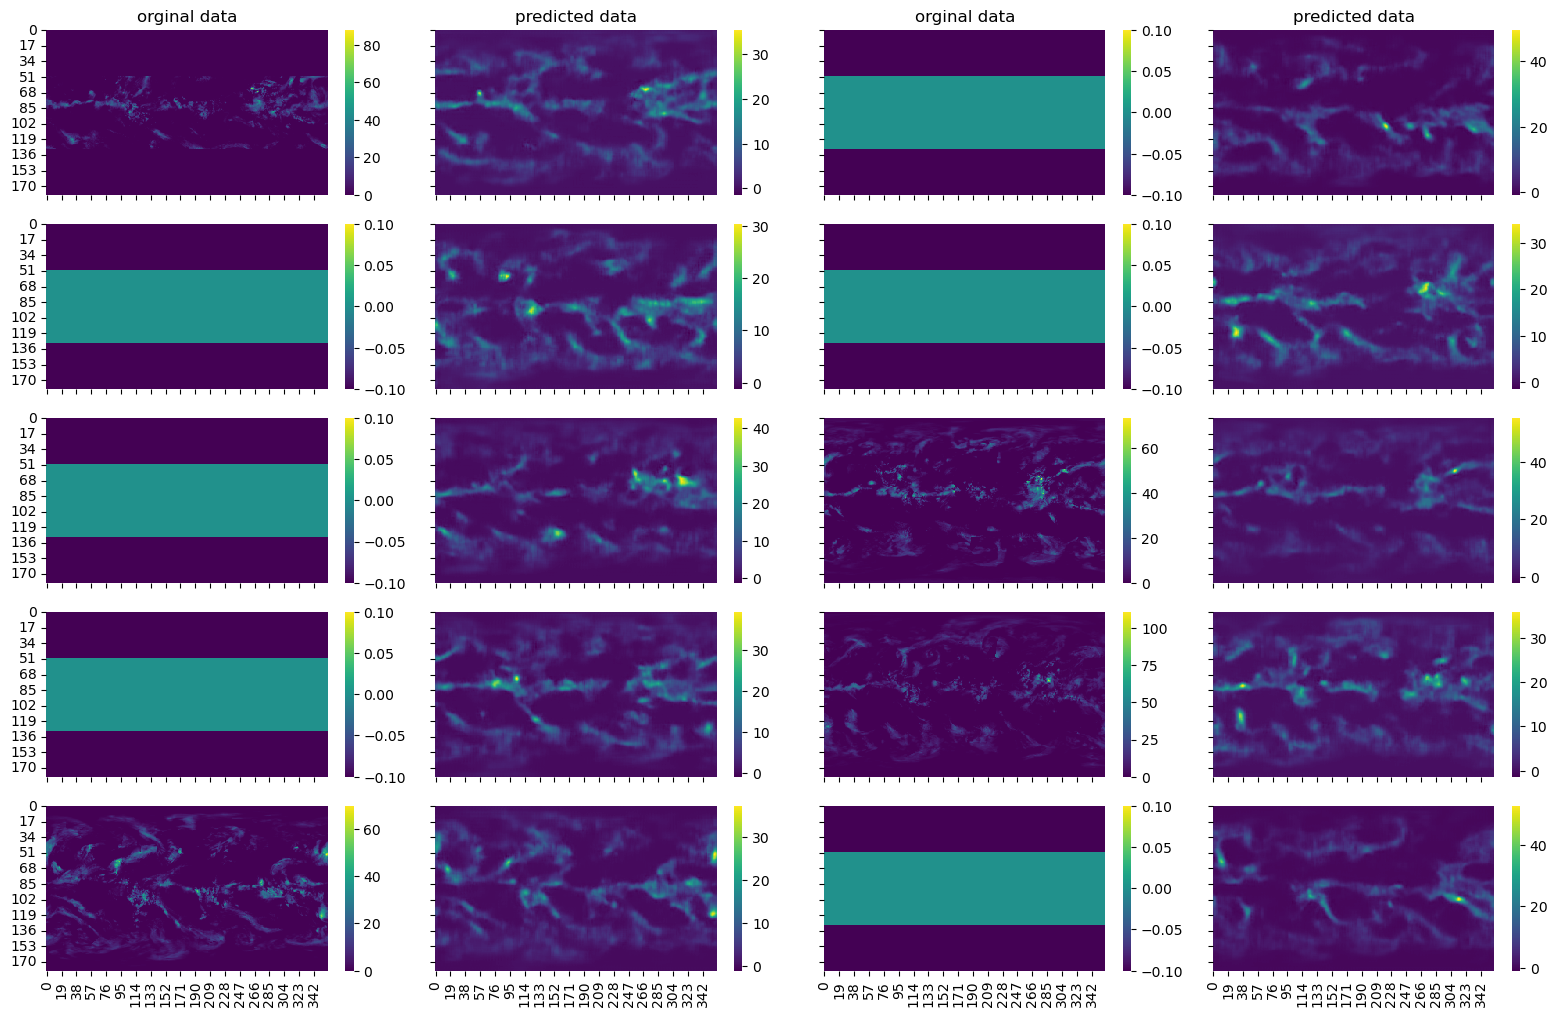

In [36]:
fig, axs = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True, figsize=(16,10))
fig.tight_layout()
for i,x in enumerate(idx_pred_IIOII):
    sns.heatmap(List_data[x,::-1,:], cmap="viridis",vmin = 0,  ax=axs[math.floor(i/2), i%2 *2])
    sns.heatmap(pred_precip[i,::-1,:,0], cmap="viridis", ax=axs[math.floor(i/2), i%2 *2+1])
axs[0,0].set_title('orginal data')
axs[0,1].set_title('predicted data')
axs[0,2].set_title('orginal data')
axs[0,3].set_title('predicted data')
plt.show()

## Merge the predicted data with the original data

In [63]:
dataset_pred = List_data.copy() 
for i,x in enumerate(idx_pred_IIOII):
    # if the max values of the time slice is zero, replace the complete slice with the predicted data
    if dataset_pred[x,:,:].max() == 0:
        dataset_pred[x,:,:] = pred_precip[i,:,:,0]
    # otherwise set all pixels that does not contain missing values in the original data to 0 in the predicted data
    # and set all missing data (-99999) in the original data to 0
    # add both slices together -> imputed data
    else:
        dataset_pred[x,:,:] = (dataset_pred[x,:,:] != -99999)*dataset_pred[x,:,:] + (dataset_pred[x,:,:] == -99999)*pred_precip[i,:,:,0]


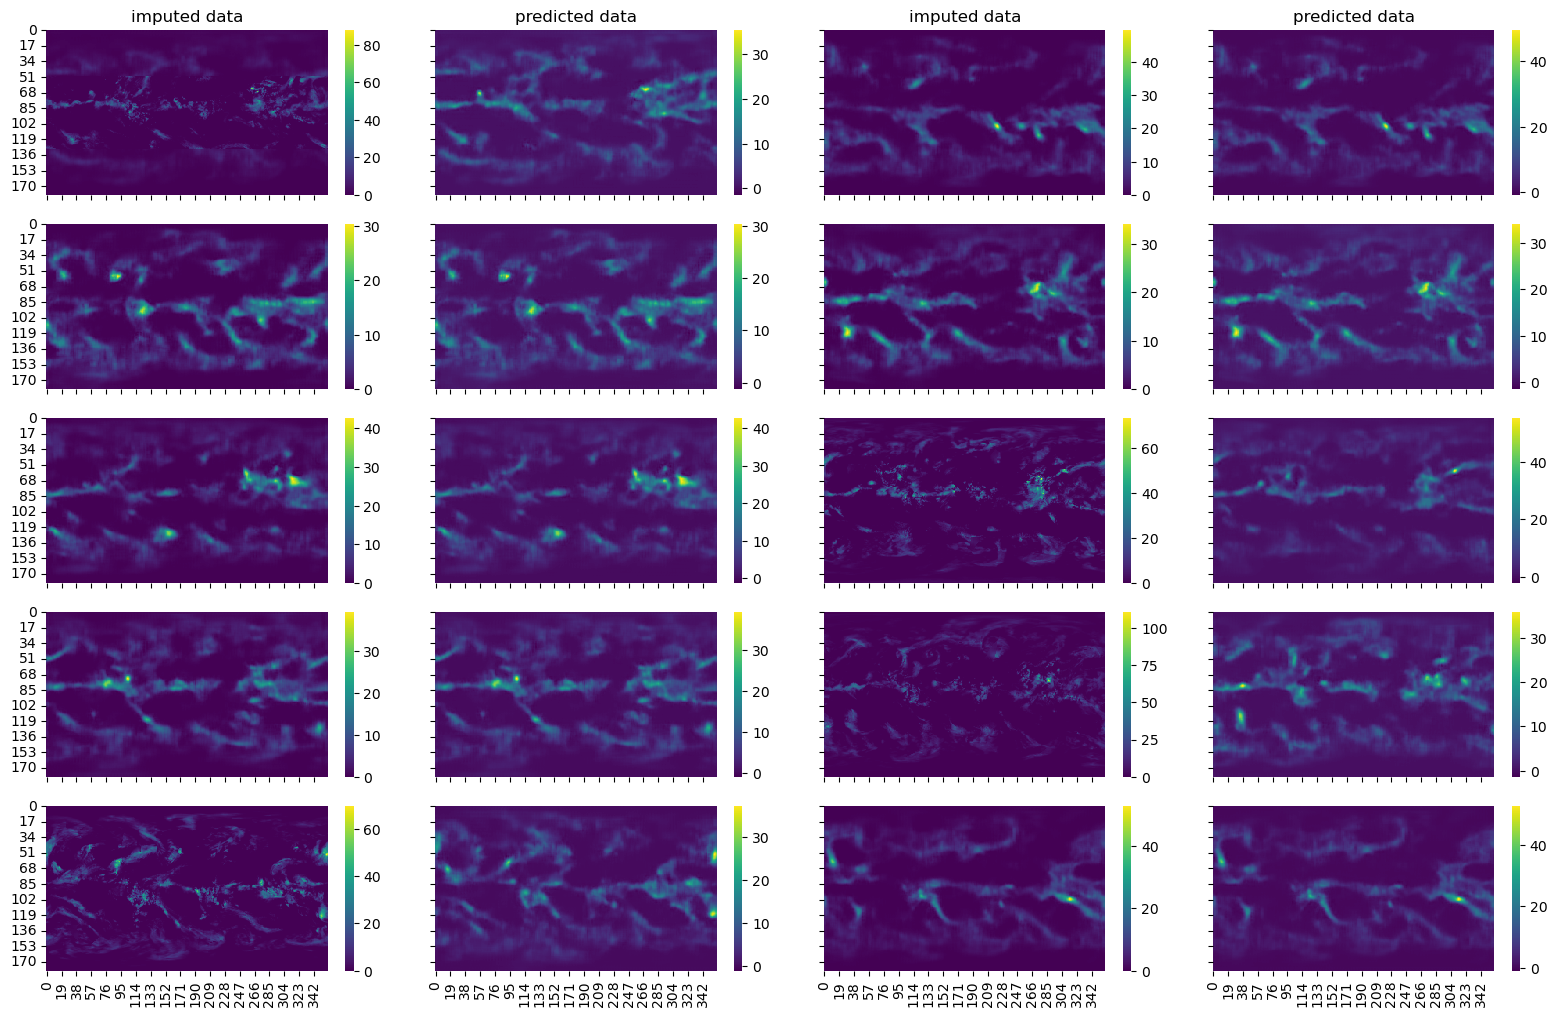

In [64]:
fig, axs = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=True, figsize=(16,10))
fig.tight_layout()
for i,x in enumerate(idx_pred_IIOII):
    sns.heatmap(dataset_pred[x,::-1,:], cmap="viridis",vmin = 0,  ax=axs[math.floor(i/2), i%2 *2])
    sns.heatmap(pred_precip[i,::-1,:,0], cmap="viridis", ax=axs[math.floor(i/2), i%2 *2+1])
axs[0,0].set_title('imputed data')
axs[0,1].set_title('predicted data')
axs[0,2].set_title('imputed data')
axs[0,3].set_title('predicted data')
plt.show()

# Max Values

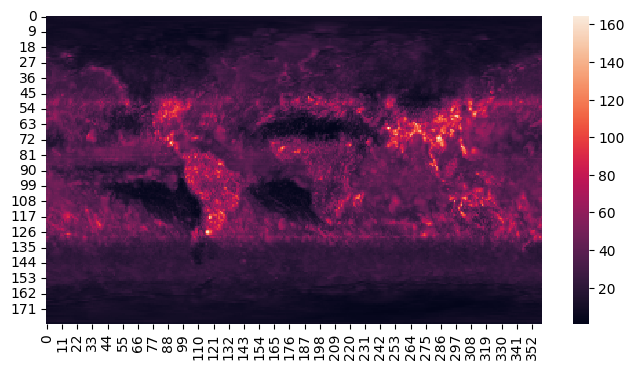

In [47]:
plt.figure(figsize=(8,4))
sns.heatmap(List_data.max(axis = 0)[::-1,:])
plt.show()

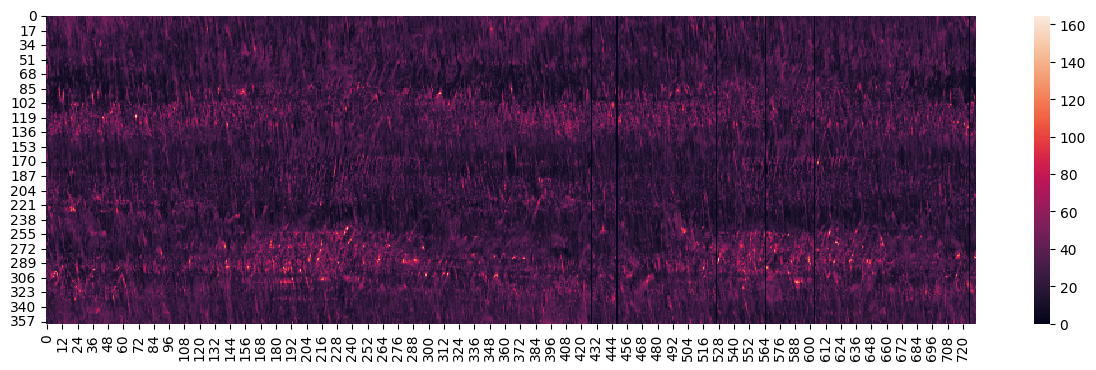

In [48]:
plt.figure(figsize=(15,4))
sns.heatmap(List_data.max(axis = 1).transpose())
plt.show()

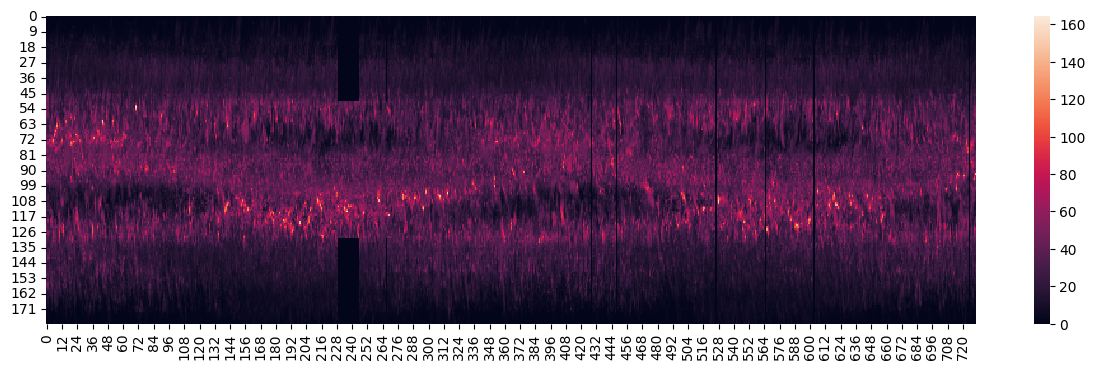

In [49]:
plt.figure(figsize=(15,4))
sns.heatmap(List_data.max(axis = 2).transpose(), vmin = 0)
plt.show()

# Saving

In [129]:
np.save("./data/WaterPrecip_datacube.npy", List_data)

In [29]:
np.save("./data/WaterPrecip_time.npy", List_time)
np.save("./data/WaterPrecip_latitude.npy", latitude)
np.save("./data/WaterPrecip_longitude.npy", longitude)

# Distribution of Precipitation

In [37]:
temp = List_data.flatten()

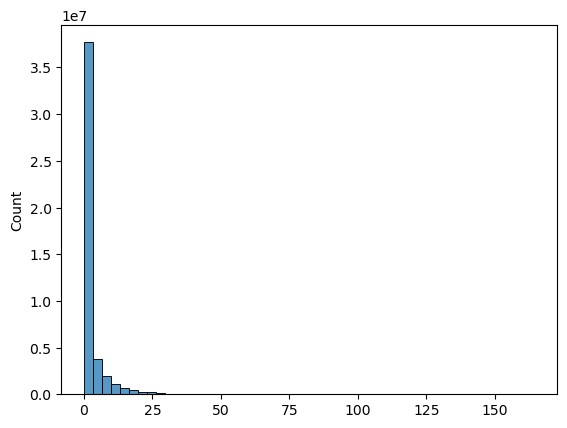

In [38]:
sns.histplot(temp[temp > -1], bins = 50)
plt.show()

In [39]:
temp = np.vectorize(lambda x: math.log(x) if x>0 else -9999.)(temp)

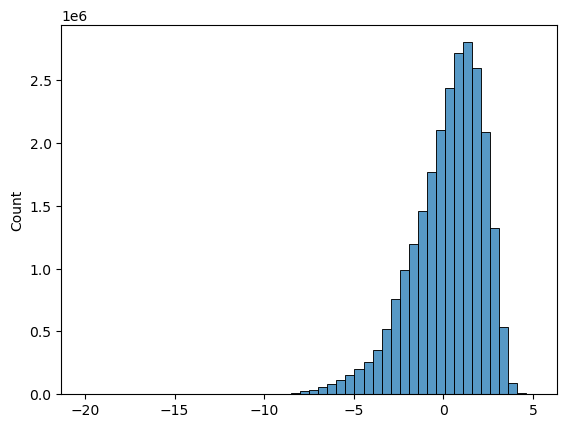

In [40]:
sns.histplot(temp[temp > -50], bins = 50)
plt.show()

The log transformed data is not normal distibuted. Therefore for the following analysis no log transformation are performed